# End-Gauge Measurement
## Example H1 from the GUM and GUM-Supplement 1

The example defines numerous input parameters with different distributions. Instead of converting all the distributions into standard uncertainty, the values can be entered using the distribution shape parameters.
Descriptions are also added for each component for display in the report tables.
Because each input may have multiple uncertainty components, we'll explicitly enter
each component using set_uncert() instead of setting a default uncertainty using set_input().

Note: GUM H1 uses all normal/standard distributions for GUM calculation. Supplement 1 describes distribution
types for Monte-Carlo.

In [1]:
import suncal

In [2]:
u = suncal.UncertCalc('l = d - l_s*(alpha_s*d_theta + d_alpha*theta) + l_s', units='nm')

# l_s is given as u=.075 @ k=3
u.set_input('l_s', nom=50000623.6, desc='Length of standard at 20C from certificate', units='nm')
u.set_uncert('l_s', name='u_{ls}', unc=75, k=3, degf=18, desc='Uncertainty of the standard')

# Variable d has 3 uncertainties...
u.set_input('d', nom=215, desc='Measured difference between end gauges', units='nm')
# First is T-distribution with k=1 uncertainty of 10...
u.set_uncert('d', name='u_{d1}', dist='t', unc=10, conf=.95, degf=5, desc='Random effects of comparator')
# Normal with k=3...
u.set_uncert('d', name='u_{d2}', unc=20, k=3, degf=8, desc='Systematic effects of comparator')
# and a standard uncertainty.
u.set_uncert('d', name='u_d', std=5.8, degf=24, desc='Repeated obeservations')

# theta has 2 uncertainty components.
# Arcsine distribution specified with half-width parameter a
u.set_input('theta', nom=-0.1, desc='Deviation in temperature of test bed from 20C ambient', units='delta_degC')
u.set_uncert('theta', name='u_Delta', dist='arcsine', a=0.5, desc='Cyclic variation of temperature in room')
u.set_uncert('theta', name='u_theta', std=0.2, desc='Mean temperature of the bed')

# Uniform distribution specified with half-width parameter a
u.set_input('alpha_s', nom=1.15E-5, desc='Coefficient of thermal expansion', units='1/delta_degC')
u.set_uncert('alpha_s', name='u_{alpha_s}', dist='uniform', a=2E-6, desc='Thermal expansion coefficient of standard')

# Curvilinear Trapezoid distribution takes half-width a and curvature d
u.set_input('d_alpha', nom=0, desc='Difference in expansion coefficients', units='1/delta_degC')
u.set_uncert('d_alpha', name='u_{da}', dist='curvtrap', a=1E-6, d=0.1E-6, degf=50, desc='Difference in expansion coefficients')  # Curvilinear Trapezoid (See GUM-S1)

u.set_input('d_theta', nom=0, desc='Difference in temperatures', units='delta_degC')
u.set_uncert('d_theta', name='u_{dt}', dist='curvtrap', a=.05, d=.025, degf=2, desc='Difference in temperatures')

u.calculate()

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$l$   | GUM          | 5.0000839e+07 nm  | 32 nm           | ± 68 nm     | 2.122     | 15.8          |
|$l$   | Monte Carlo  | 5.0000839e+07 nm  | 34 nm           | (5.0000772e+07 nm, 5.0000905e+07 nm) | 1.959     | -             |

In [3]:
u.out.report_inputs()

|Variable   | Mean      | Std. Uncertainty   | Deg. Freedom   | Description                                           |
|----------|---------|------------------|--------------|------------------------------------------------------|
|$\alpha_{s}$   | 0.0000115  | 1.2e-06 1/Δ°C           | inf       | Coefficient of thermal expansion                      |
|$d$   | 215.0  | 9.7 nm           | 26       | Measured difference between end gauges                |
|$d_{\alpha}$   | 0.0  | 5.8e-07 1/Δ°C           | 50       | Difference in expansion coefficients                  |
|$d_{\theta}$   | 0.0  | 0.030 Δ°C          | 2.0      | Difference in temperatures                            |
|$l_{s}$   | 5.0000624e+07 | 25 nm          | 18      | Length of standard at 20C from certificate            |
|$\theta$   | -0.10 | 0.41 Δ°C          | inf      | Deviation in temperature of test bed from 20C ambient |

In [4]:
u.out.report_components()

|Variable   | Component   | Description                                            | Standard Uncertainty   | Deg. Freedom  |
|----------|-----------|------------------------------------------------------|----------------------|--------------|
|$\alpha_{s}$   | -           | Coefficient of thermal expansion                       | 1.2e-06 1/Δ°C               | inf           |
|-          | $u_{alpha_s}$    | Thermal expansion coefficient of standard              | 1.2e-06 1/Δ°C               | inf           |
|$d$   | -           | Measured difference between end gauges                 | 9.7 nm               | 25.6          |
|-          | $u_{d1}$    | Random effects of comparator                           | 3.9 nm               | 5.0           |
|-          | $u_{d2}$    | Systematic effects of comparator                       | 6.7 nm               | 8.0           |
|-          | $u_{d}$    | Repeated obeservations                                 | 5.8 nm               | 24.0          |
|$d_{\alpha}$   | -           | Difference in expansion coefficients                   | 5.8e-07 1/Δ°C               | 50.0          |
|-          | $u_{da}$    | Difference in expansion coefficients                   | 5.8e-07 1/Δ°C               | 50.0          |
|$d_{\theta}$   | -           | Difference in temperatures                             | 0.030 Δ°C               | 2.0           |
|-          | $u_{dt}$    | Difference in temperatures                             | 0.030 Δ°C               | 2.0           |
|$l_{s}$  | -           | Length of standard at 20C from certificate             | 25 nm              | 18.0          |
|-          | $u_{ls}$   | Uncertainty of the standard                            | 25 nm              | 18.0          |
|$\theta$  | -           | Deviation in temperature of test bed from 20C ambient  | 0.41 Δ°C              | inf           |
|-          | $u_{\Delta}$   | Cyclic variation of temperature in room                | 0.35 Δ°C              | inf           |
|-          | $u_{\theta}$   | Mean temperature of the bed                            | 0.20 Δ°C              | inf           |

In [5]:
u.out.report_expanded()

### GUM Approximation


|Function   | Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  |
|----------|----------|---------|---------|---------|--------------|----------------------|
|$l$   | 99.00%     | 5.0e+07 nm  | 5.0e+07 nm  | 2.926     | 15.78          | 94 nm              |
|-          | 95.00%     | 5.0e+07 nm  | 5.0e+07 nm  | 2.122     | 15.78          | 68 nm              |
|-          | 90.00%     | 5.0e+07 nm  | 5.0e+07 nm  | 1.747     | 15.78          | 56 nm              |
|-          | 68.00%     | 5.0e+07 nm  | 5.0e+07 nm | 1.027     | 15.78          | 33 nm             |


### Monte Carlo

Symmetric Coverage Intervals

|Function   | Interval   | Min       | Max       | k        |
|----------|----------|---------|---------|---------|
|$l$   | 99.00%     | 5.0e+07 nm  | 5.0e+07 nm  | 2.563    |
|-          | 95.00%     | 5.0e+07 nm  | 5.0e+07 nm  | 1.959    |
|-          | 90.00%     | 5.0e+07 nm  | 5.0e+07 nm  | 1.645    |
|-          | 68.00%     | 5.0e+07 nm  | 5.0e+07 nm  | 0.997    |

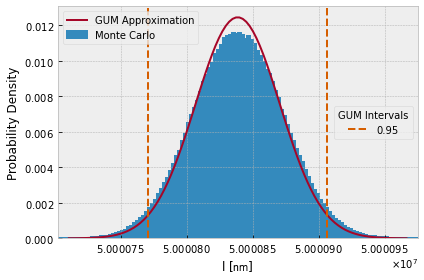

In [6]:
# Compare to GUM-Supplement1 Figure 17
u.out.plot_pdf(intervalsgum=[.95]);

In [7]:
u.out.gum.report_derivation()

### Measurement Model:

$l = d - l_{s} \left(\alpha_{s} d_{\theta} + d_{\alpha} \theta\right) + l_{s}$

### Measured Values:


|Variable   | Std. Uncertainty   | Deg. Freedom  |
|----------|------------------|--------------|
|$\alpha_{s} = 1.15 \cdot 10^{-5}$   | $u_{\alpha s} = 1.155 \cdot 10^{-6}\,\frac{1}{\mathrm{ \Delta ^{\circ} C}}$           | $\nu_{\alpha s} = \infty$      |
|$d = 215.0$   | $u_{d} = 9.655\,\mathrm{nm}$           | $\nu_{d} = 25.57$      |
|$d_{\alpha} = 0$   | $u_{d \alpha} = 5.783 \cdot 10^{-7}\,\frac{1}{\mathrm{ \Delta ^{\circ} C}}$           | $\nu_{d \alpha} = 50.0$      |
|$d_{\theta} = 0$  | $u_{d \theta} = 0.03005\,\mathrm{ \Delta ^{\circ} C}$          | $\nu_{d \theta} = 2.0$     |
|$l_{s} = 5.0 \cdot 10^{7}$  | $u_{l s} = 25.0\,\mathrm{nm}$          | $\nu_{l s} = 18.0$     |
|$\theta = -0.1$  | $u_{\theta} = 0.4062\,\mathrm{ \Delta ^{\circ} C}$          | $\nu_{\theta} = \infty$     |


### Sensitivity Coefficients:

$\frac{\partial}{\partial \alpha_{s}} l = - d_{\theta} l_{s}$  $ = -0.0000$ nm·Δ°C

$\frac{\partial}{\partial d} l = 1$  $ = 1.0000$

$\frac{\partial}{\partial d_{\alpha}} l = - l_{s} \theta$  $ = 5000062.3600$ nm·Δ°C

$\frac{\partial}{\partial d_{\theta}} l = - \alpha_{s} l_{s}$  $ = -575.0072$ nm/Δ°C

$\frac{\partial}{\partial l_{s}} l = - \alpha_{s} d_{\theta} - d_{\alpha} \theta + 1$  $ = 1.0000$ 

$\frac{\partial}{\partial \theta} l = - d_{\alpha} l_{s}$  $ = -0.0000$ nm/Δ°C

### Combined Uncertainty:

$u_{l} = \sqrt{u_{\alpha s}^{2} \left(\frac{\partial}{\partial \alpha_{s}} l\right)^{2} + u_{d}^{2} \left(\frac{\partial}{\partial d} l\right)^{2} + u_{d \alpha}^{2} \left(\frac{\partial}{\partial d_{\alpha}} l\right)^{2} + u_{d \theta}^{2} \left(\frac{\partial}{\partial d_{\theta}} l\right)^{2} + u_{l s}^{2} \left(\frac{\partial}{\partial l_{s}} l\right)^{2} + u_{\theta}^{2} \left(\frac{\partial}{\partial \theta} l\right)^{2}}$

$u_{l} = \sqrt{\alpha_{s}^{2} l_{s}^{2} u_{d \theta}^{2} + d_{\alpha}^{2} l_{s}^{2} u_{\theta}^{2} + d_{\theta}^{2} l_{s}^{2} u_{\alpha s}^{2} + l_{s}^{2} \theta^{2} u_{d \alpha}^{2} + u_{d}^{2} + u_{l s}^{2} \left(\alpha_{s} d_{\theta} + d_{\alpha} \theta - 1\right)^{2}} = 32.02\,\mathrm{nm}$

### Effective degrees of freedom:

$\nu_{l} = \frac{u_{l}^{4}}{\frac{\alpha_{s}^{4} l_{s}^{4} u_{d \theta}^{4}}{\nu_{d \theta}} + \frac{d_{\alpha}^{4} l_{s}^{4} u_{\theta}^{4}}{\nu_{\theta}} + \frac{d_{\theta}^{4} l_{s}^{4} u_{\alpha s}^{4}}{\nu_{\alpha s}} + \frac{l_{s}^{4} \theta^{4} u_{d \alpha}^{4}}{\nu_{d \alpha}} + \frac{u_{l s}^{4} \left(- \alpha_{s} d_{\theta} - d_{\alpha} \theta + 1\right)^{4}}{\nu_{l s}} + \frac{u_{d}^{4}}{\nu_{d}}} = 15.78$